In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

# Predicting When Popular Songs Were Made Based On Musical Qualities

Data gathered via [figshare](https://figshare.com/articles/Main_Dataset_for_Evolution_of_Popular_Music_USA_1960_2010_/1309953): "Evolution of Popular Music: USA 1960–2010" by Matthias Mauch

In [2]:
df = pd.read_csv('EvolutionPopUSA_MainData.csv')

In [3]:
df.sample(5)

,recording_id,artist_name,artist_name_clean,track_name,first_entry,quarter,year,fiveyear,decade,era,...,timb_26,timb_27,timb_28,timb_29,timb_30,timb_31,timb_32,timb_33,timb_34,timb_35
8978,8979,Apocalyptica Featuring Adam Gontier,APOCALYPTICA,I Don't Care,2008-11-01,2008 Q4,2008,2005,2000,4,...,2,0,58,5,80,22,2,4,21,0
8689,8690,The Soulful Strings,SOULFULSTRINGS,Burning Spear,1968-02-03,1968 Q1,1968,1965,1960,2,...,17,0,110,4,0,45,7,22,18,0
85,86,Eagles,EAGLES,Get Over It,1994-10-29,1994 Q4,1994,1990,1990,4,...,22,0,30,4,51,76,3,0,7,0
11914,11915,The Sylvers,SYLVERS,Hot Line,1976-10-09,1976 Q4,1976,1975,1970,2,...,33,45,3,6,58,42,7,3,55,15
8600,8601,Dolly Parton,DOLLYPARTON,Sweet Summer Lovin',1979-09-29,1979 Q3,1979,1975,1970,2,...,27,2,17,5,0,29,12,33,25,79


In [4]:
df.shape

(17094, 269)

**public_id**
unique ID of the recording

**artist_name**
name of the recording artist

**artist_name_clean**
artist name all upper case, no spaces, with secondary artists ("featuring") removed.

**track_name**
name of the track, i.e. usually name of the song

**first_entry**
date of the first entry into the Billboard Hot 100

**quarter, year, fiveyear, decade**
transformations of first_entry to coarser time periods

**era**
era the track belongs to (1,...,4), as determined by Foote segmentation on the PC data (see below)

**cluster**
cluster membership of the track, as derived by k-means clustering on the PC data (see below)

**hTopic_01, ... , hTopic_08**
harmonic Topic weights, see description in the paper

**tTopic_01, ... , tTopic_08**
timbral Topic weights, see description in the paper. Examples include drums, aggressive, percussive, calm, quiet, mellow, energetic, speech, bright, piano, orchestra, harmonic, guitar, loud, etc.

**PC1, ... , PC14**
principal components of the harmonic and timbral Topics

**harm_…**
193 columns of chord change counts; the chord change is indicated in the column label (e.g. harm_M.2.M means major chord followed by another major chord 2 semitones up).

**timb_01, ... , timb_35**
35 columns of timbre class counts (see description in supplementary information)

# Explore the data

In [5]:
df.dtypes

recording_id           int64
artist_name           object
artist_name_clean     object
track_name            object
first_entry           object
quarter               object
year                   int64
fiveyear               int64
decade                 int64
era                    int64
cluster                int64
hTopic_01            float64
hTopic_02            float64
hTopic_03            float64
hTopic_04            float64
hTopic_05            float64
hTopic_06            float64
hTopic_07            float64
hTopic_08            float64
tTopic_01            float64
tTopic_02            float64
tTopic_03            float64
tTopic_04            float64
tTopic_05            float64
tTopic_06            float64
tTopic_07            float64
tTopic_08            float64
PC1                  float64
PC2                  float64
PC3                  float64
                      ...   
timb_06                int64
timb_07                int64
timb_08                int64
timb_09       

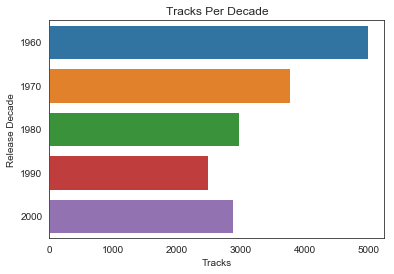

In [6]:
sns.countplot(y="decade", data=df)
plt.xlabel("Tracks")
plt.ylabel("Release Decade")
plt.title("Tracks Per Decade") 
plt.show()

# How much variance is the in the musical qualities?

## Scatterplot

             era    decade
era     1.000000  0.921142
decade  0.921142  1.000000


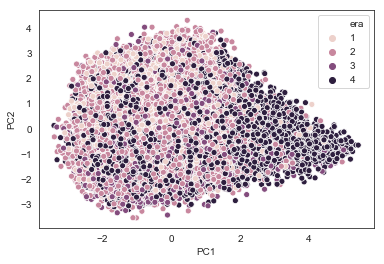

In [7]:
# Scatterplot representing two of the Principal Components columns
print(df.loc[:, ['era','decade']].corr())

df.loc[:, ['era','decade']].drop_duplicates()

sns.scatterplot(x= df['PC1'], 
                     y=df['PC2'],
                     hue = df['era'],
                     data = df)
plt.show()

             era    decade
era     1.000000  0.921142
decade  0.921142  1.000000


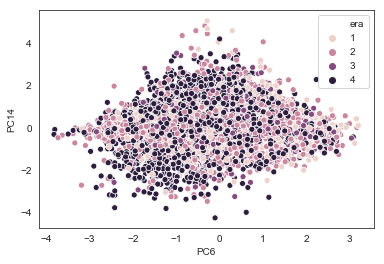

In [8]:
# Another scatterplot representing two different Principal Components columns
print(df.loc[:, ['era','decade']].corr())

df.loc[:, ['era','decade']].drop_duplicates()

sns.scatterplot(x= df['PC6'], 
                     y=df['PC14'],
                     hue = df['era'],
                     data = df)
plt.show()

## Histograms

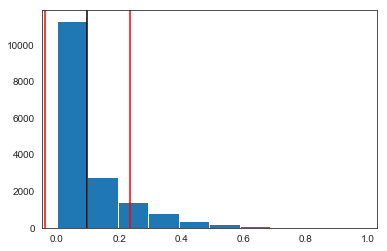

In [9]:
htopic01 = df['hTopic_01']
mean = np.mean(htopic01)
sd = np.std(htopic01)

plt.hist(htopic01)
plt.axvline(x=mean,color='black')
plt.axvline(x=mean+sd, color='red')
plt.axvline(x=mean-sd, color='red')
plt.show()

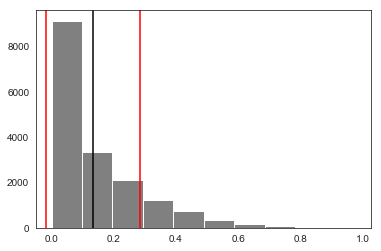

In [10]:
ttopic01 = df['tTopic_01']
mean = np.mean(ttopic01)
sd = np.std(ttopic01)

plt.hist(ttopic01, color = 'grey')
plt.axvline(x=mean,color='black')
plt.axvline(x=mean+sd, color='red')
plt.axvline(x=mean-sd, color='red')
plt.show()

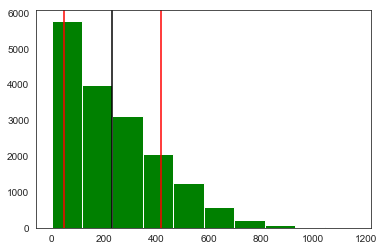

In [11]:
harmm0m = df['harm_M.0.M']
mean = np.mean(harmm0m)
sd = np.std(harmm0m)

plt.hist(harmm0m, color = 'green')
plt.axvline(x=mean,color='black')
plt.axvline(x=mean+sd, color='red')
plt.axvline(x=mean-sd, color='red')
plt.show()

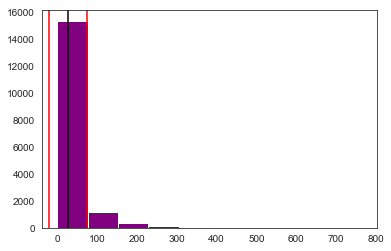

In [12]:
timb01 = df['timb_01']
mean = np.mean(timb01)
sd = np.std(timb01)

plt.hist(timb01, color = 'purple')
plt.axvline(x=mean,color='black')
plt.axvline(x=mean+sd, color='red')
plt.axvline(x=mean-sd, color='red')
plt.show()

## How is the data split up by the 'era' column?

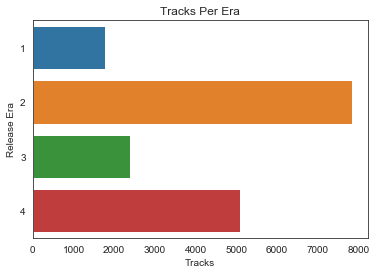

In [13]:
sns.countplot(y="era", data=df)
plt.xlabel("Tracks")
plt.ylabel("Release Era")
plt.title("Tracks Per Era") 
plt.show()

In [14]:
df.groupby('era')['decade'].value_counts()

era  decade
1    1960      1770
2    1970      3764
     1960      3227
     1980       845
3    1980      2131
     1990       262
4    2000      2874
     1990      2221
Name: decade, dtype: int64

In [15]:
df.groupby('year')['era'].value_counts(ascending=True)

year  era
1960  1      451
1961  1      492
1962  1      465
1963  2      115
      1      362
1964  2      518
1965  2      524
1966  2      547
1967  2      545
1968  2      499
1969  2      479
1970  2      414
1971  2      445
1972  2      421
1973  2      390
1974  2      369
1975  2      399
1976  2      350
1977  2      319
1978  2      314
1979  2      343
1980  2      327
1981  2      279
1982  3       78
      2      239
1983  3      321
1984  3      287
1985  3      291
1986  3      300
1987  3      283
1988  3      287
1989  3      284
1990  3      262
1991  4      247
1992  4      243
1993  4      249
1994  4      253
1995  4      271
1996  4      234
1997  4      240
1998  4      257
1999  4      227
2000  4      236
2001  4      249
2002  4      263
2003  4      262
2004  4      270
2005  4      288
2006  4      321
2007  4      288
2008  4      346
2009  4      351
Name: era, dtype: int64

In [16]:
# Count null values
null_count = df.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

# Testing

The code below was originally tested on 'decade.'  The results were poor, so I tried again on 'era.'  The results were a bit better; however, I ended up getting the best results splitting 'era' into two parts rather than the four parts it was originally.  

In [17]:
df_2 = df.drop(['artist_name', 'artist_name_clean', 'track_name', 'first_entry', 'quarter', 'year', 
               'fiveyear', 'decade', 'recording_id', 'cluster'], axis=1)

In [18]:
df_2 = df_2.drop(df_2.columns.values[['PC' in val for val in df_2.columns.values]], axis = 1)

In [19]:
df_2.dtypes

era              int64
hTopic_01      float64
hTopic_02      float64
hTopic_03      float64
hTopic_04      float64
hTopic_05      float64
hTopic_06      float64
hTopic_07      float64
hTopic_08      float64
tTopic_01      float64
tTopic_02      float64
tTopic_03      float64
tTopic_04      float64
tTopic_05      float64
tTopic_06      float64
tTopic_07      float64
tTopic_08      float64
harm_M.0.M       int64
harm_M.1.M       int64
harm_M.2.M       int64
harm_M.3.M       int64
harm_M.4.M       int64
harm_M.5.M       int64
harm_M.6.M       int64
harm_M.7.M       int64
harm_M.8.M       int64
harm_M.9.M       int64
harm_M.10.M      int64
harm_M.11.M      int64
harm_M.0.m       int64
                ...   
timb_06          int64
timb_07          int64
timb_08          int64
timb_09          int64
timb_10          int64
timb_11          int64
timb_12          int64
timb_13          int64
timb_14          int64
timb_15          int64
timb_16          int64
timb_17          int64
timb_18    

In [20]:
df['era_2'] = np.where(df['era'] > 2, 1, 0)

In [21]:
df.dtypes

recording_id           int64
artist_name           object
artist_name_clean     object
track_name            object
first_entry           object
quarter               object
year                   int64
fiveyear               int64
decade                 int64
era                    int64
cluster                int64
hTopic_01            float64
hTopic_02            float64
hTopic_03            float64
hTopic_04            float64
hTopic_05            float64
hTopic_06            float64
hTopic_07            float64
hTopic_08            float64
tTopic_01            float64
tTopic_02            float64
tTopic_03            float64
tTopic_04            float64
tTopic_05            float64
tTopic_06            float64
tTopic_07            float64
tTopic_08            float64
PC1                  float64
PC2                  float64
PC3                  float64
                      ...   
timb_07                int64
timb_08                int64
timb_09                int64
timb_10       

# 'era_2' --> 3 & 4 = 1
# 'era_2' --> 1 & 2 = 0

In [22]:
df_2 = df.drop(['artist_name', 'artist_name_clean', 'track_name', 'first_entry', 'quarter', 'year', 
               'fiveyear', 'decade', 'recording_id', 'cluster', 'era'], axis=1)

In [23]:
df_2 = df_2.drop(df_2.columns.values[['PC' in val for val in df_2.columns.values]], axis = 1)

In [24]:
df_2.dtypes

hTopic_01      float64
hTopic_02      float64
hTopic_03      float64
hTopic_04      float64
hTopic_05      float64
hTopic_06      float64
hTopic_07      float64
hTopic_08      float64
tTopic_01      float64
tTopic_02      float64
tTopic_03      float64
tTopic_04      float64
tTopic_05      float64
tTopic_06      float64
tTopic_07      float64
tTopic_08      float64
harm_M.0.M       int64
harm_M.1.M       int64
harm_M.2.M       int64
harm_M.3.M       int64
harm_M.4.M       int64
harm_M.5.M       int64
harm_M.6.M       int64
harm_M.7.M       int64
harm_M.8.M       int64
harm_M.9.M       int64
harm_M.10.M      int64
harm_M.11.M      int64
harm_M.0.m       int64
harm_M.1.m       int64
                ...   
timb_07          int64
timb_08          int64
timb_09          int64
timb_10          int64
timb_11          int64
timb_12          int64
timb_13          int64
timb_14          int64
timb_15          int64
timb_16          int64
timb_17          int64
timb_18          int64
timb_19    

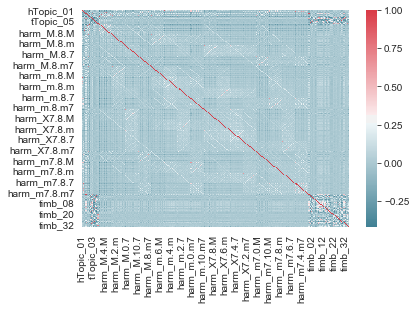

In [25]:
corr = df_2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

## Train/Test Split

In [26]:
X = df_2.drop('era_2', 1)
Y = df_2['era_2']
X = X.dropna(axis=1)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('Size of x train: %s \nSize of y train: %s \nSize of x test: %s \nSize of y test: %s' %
      (' x '.join(map(str,X_train.shape)), 
       ' x '.join(map(str,Y_train.shape)),
       ' x '.join(map(str,X_test.shape)), 
       ' x '.join(map(str,Y_test.shape))))

Size of x train: 13675 x 244 
Size of y train: 13675 
Size of x test: 3419 x 244 
Size of y test: 3419


# Decision Tree

In [28]:
from sklearn import tree

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
dt_model = decision_tree.fit(X_train, Y_train)

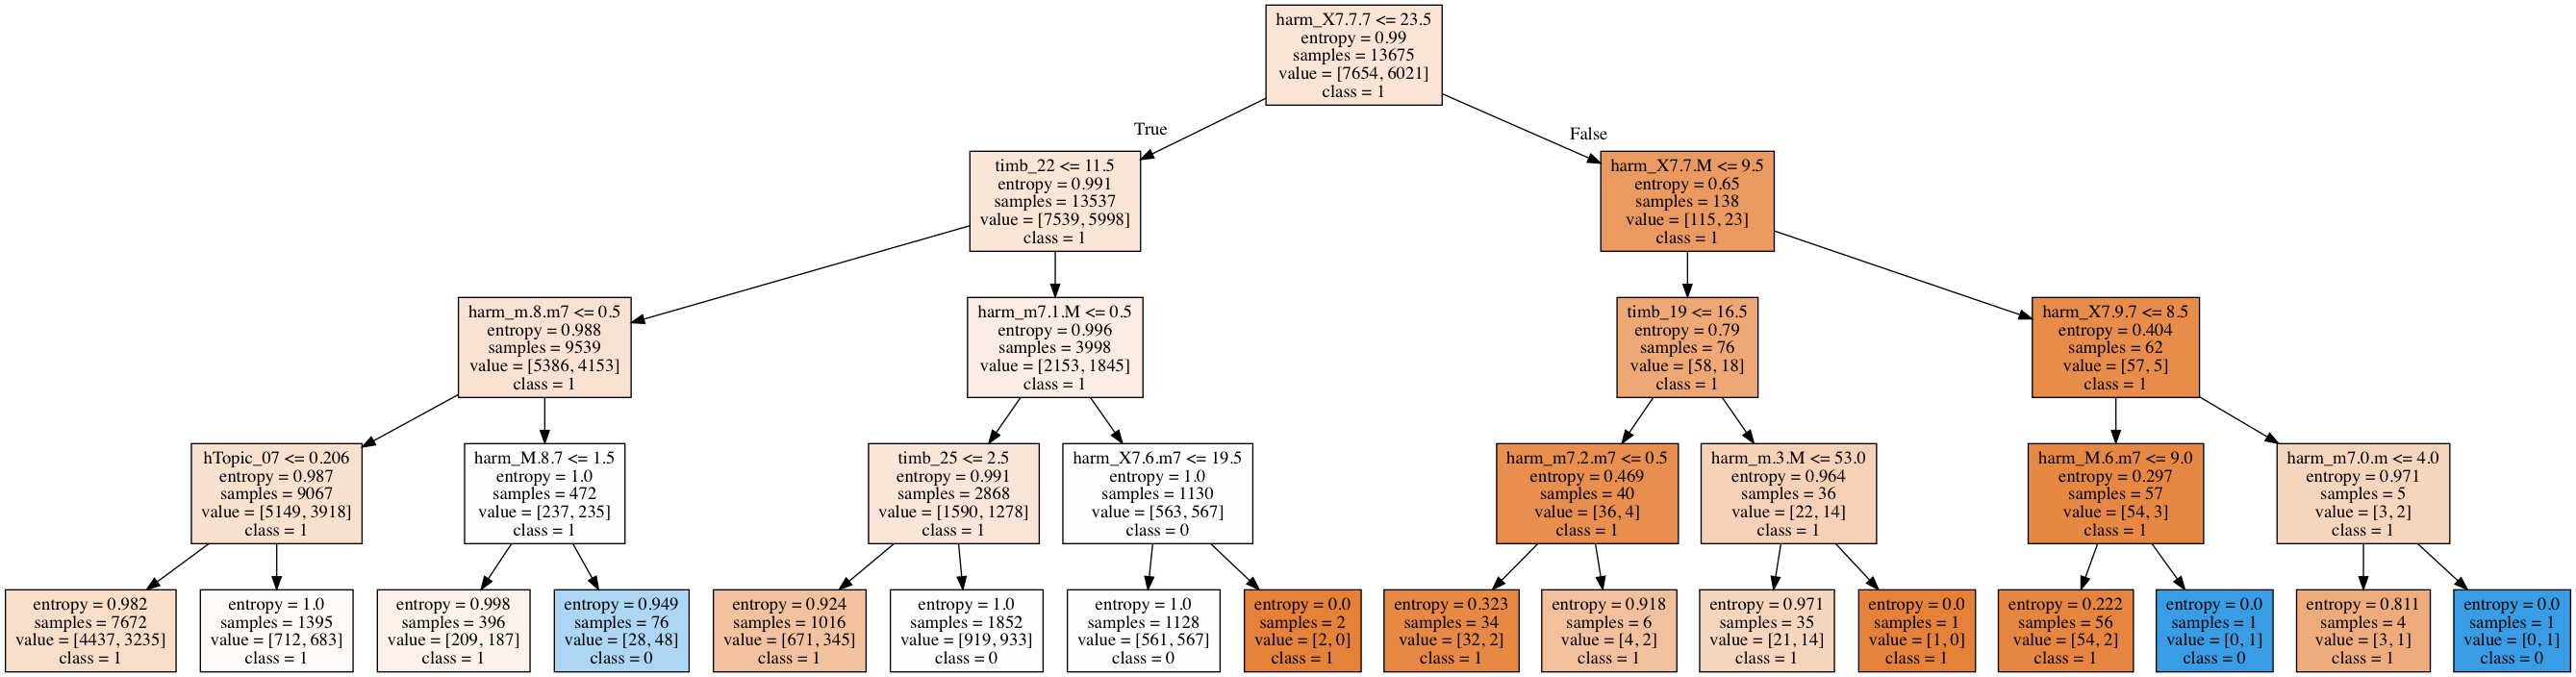

In [29]:
dot_data = tree.export_graphviz(
    dt_model, out_file=None,
    feature_names=X_train.columns,
    class_names=[str(x) for x in Y_train.unique()],
    filled=True
)
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [30]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score_dc = cross_val_score(decision_tree, X_train, Y_train, cv=10)

In [32]:
cross_val_score_dc

array([0.56537619, 0.55774854, 0.56944444, 0.56944444, 0.66276518,
       0.56254572, 0.63130944, 0.56035113, 0.57351865, 0.58376006])

In [33]:
cross_val_score_dc.mean()

0.5836263796780616

# Random Forest

In [34]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(n_jobs=-1)

In [35]:
cross_val_score(rfc, X_train, Y_train, cv=10)

array([0.72242513, 0.73318713, 0.71345029, 0.75073099, 0.72055596,
       0.72494514, 0.74908559, 0.71982443, 0.74615947, 0.72567666])

In [36]:
cross_val_score_rf = cross_val_score(rfc, X_train, Y_train, cv=14)

In [37]:
cross_val_score_rf.mean()

0.730091689381436

In [38]:
rf_model = rfc.fit(X_train, Y_train)
print('Predicting on train: ' + str(rf_model.score(X_train, Y_train)))
print('Predicting on test: ' + str(rf_model.score(X_test, Y_test)))

Predicting on train: 0.9874223034734918
Predicting on test: 0.7434922491956713


# Feature Importance

In [39]:
features = X_train.columns
rfc.fit(X_train, Y_train)
importances = rfc.feature_importances_
indices = np.argsort(importances)
feat_lst = list(zip(features, rfc.feature_importances_))
feat_lst.sort(key = lambda x: x[1], reverse = True)
feat_lst

[('timb_15', 0.04350559890535897),
 ('timb_02', 0.026954872909500487),
 ('tTopic_01', 0.020813623951100636),
 ('hTopic_01', 0.019677583219999),
 ('hTopic_05', 0.019406029687732498),
 ('timb_19', 0.01855055377586046),
 ('tTopic_04', 0.018164186391233645),
 ('timb_18', 0.01701651140012827),
 ('tTopic_03', 0.015729919015318873),
 ('harm_M.0.7', 0.01562041836547461),
 ('timb_31', 0.01530778025751785),
 ('timb_06', 0.012985125593158384),
 ('timb_30', 0.01218191393277918),
 ('tTopic_07', 0.01205700268672824),
 ('harm_X7.0.7', 0.011878251483033408),
 ('timb_14', 0.011615662395503552),
 ('timb_21', 0.01122193946566301),
 ('timb_01', 0.011073047038242453),
 ('harm_M.0.M', 0.010895191295901026),
 ('timb_20', 0.010599068582067998),
 ('tTopic_05', 0.00986355477480377),
 ('tTopic_06', 0.00982063346257323),
 ('tTopic_08', 0.009667909539335497),
 ('timb_27', 0.009581704823675815),
 ('harm_X7.5.M', 0.009325847041390427),
 ('timb_11', 0.009323369526336542),
 ('timb_10', 0.009147758965772293),
 ('harm_N

In [40]:
# pick top 10
X_train2 = X_train[[feat[0] for feat in feat_lst[:10]]]
X_test2 = X_test[X_train2.columns.values]
X_train2.shape

(13675, 10)

## SNS Pairplot Representing Correlations Between the Top 10 Features

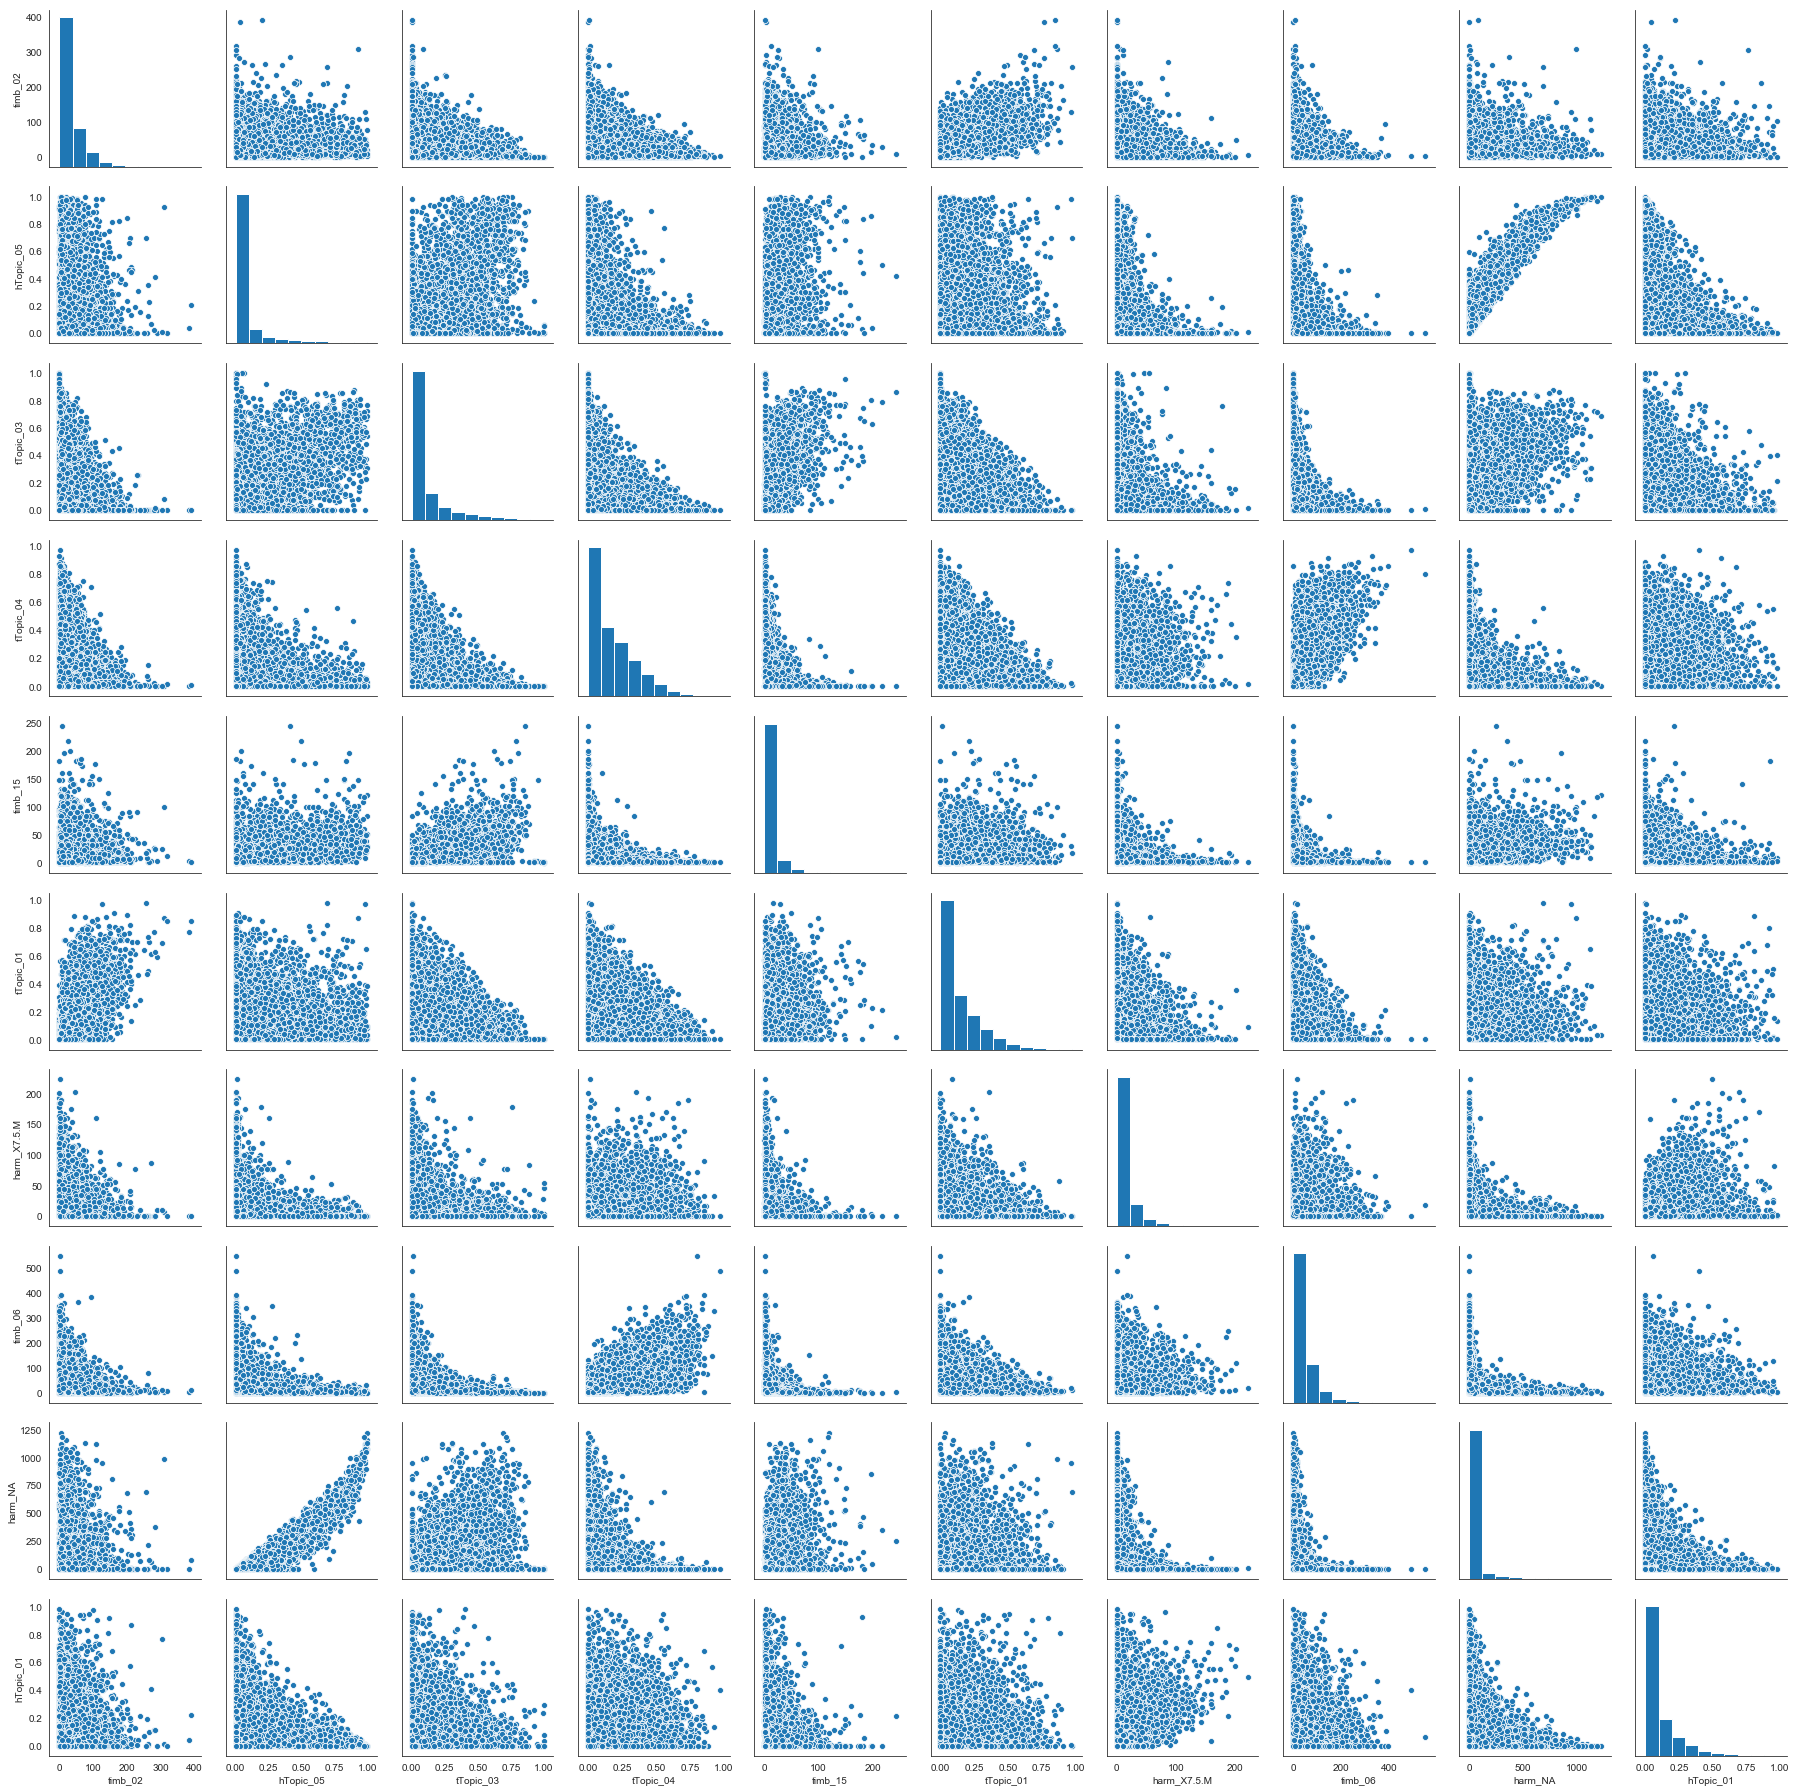

In [41]:
top_ten = sns.pairplot(df_2[['timb_02', 'hTopic_05', 'tTopic_03', 'tTopic_04', 'timb_15', 'tTopic_01', 
                          'harm_X7.5.M', 'timb_06', 'harm_NA', 'hTopic_01']])

# Decision Tree With Top 10 Features

In [42]:
# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
dt_model = decision_tree.fit(X_train2, Y_train)

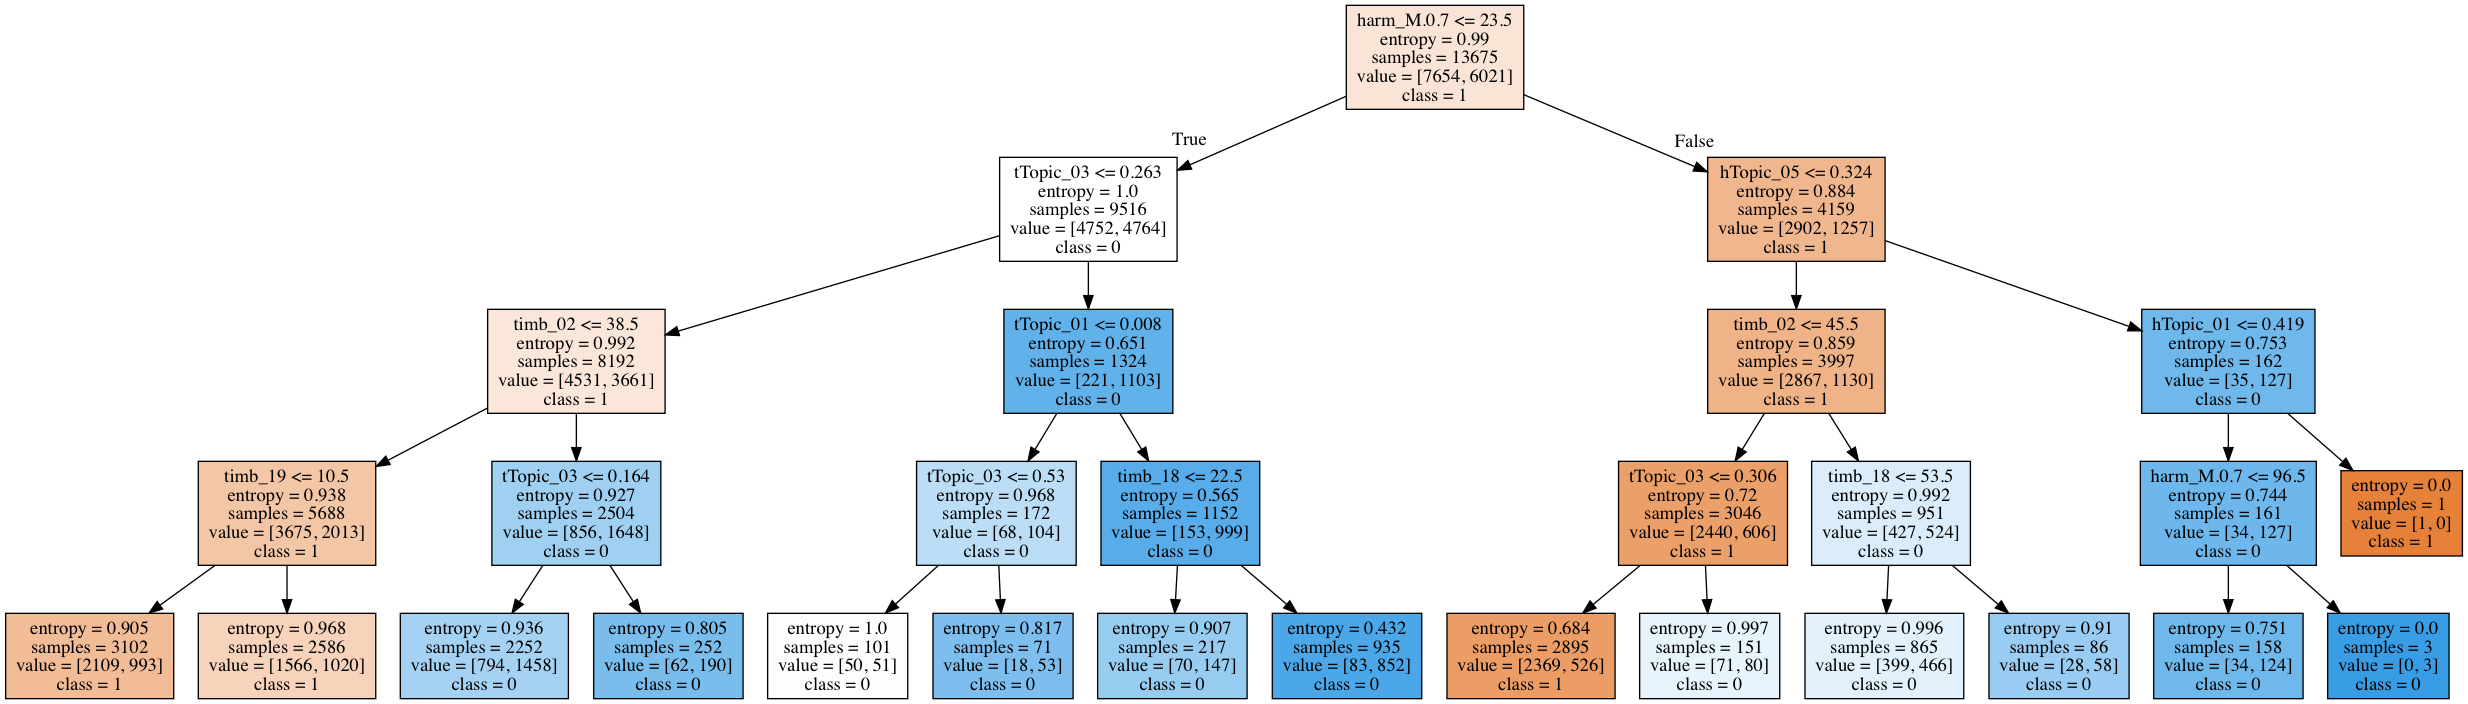

In [43]:
dot_data = tree.export_graphviz(
    dt_model, out_file=None,
    feature_names=X_train2.columns,
    class_names=[str(x) for x in Y_train.unique()],
    filled=True
)
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [44]:
cross_val_score(decision_tree, X_train2, Y_train, cv=10)

array([0.6990504 , 0.66739766, 0.6505848 , 0.67397661, 0.68471105,
       0.66349671, 0.66788588, 0.65544989, 0.69641551, 0.68836869])

In [45]:
print('Predicting on train: ' + str(dt_model.score(X_train2, Y_train)))
print('Predicting on test: ' + str(dt_model.score(X_test2, Y_test)))

Predicting on train: 0.696672760511883
Predicting on test: 0.7054694355074583


# Random Forest With Looping Features

In [46]:
### Test various hyperparameters for random forest in a loop

scores = {}
depths = [1,5,10,30,None]
for depth in depths:
        rfc = ensemble.RandomForestClassifier(n_jobs= -1,max_depth = depth)
        X = X_train2.dropna(axis=1)
        Y = Y_train
        scores[depth] = sorted(cross_val_score(rfc, X, Y, cv=10)) # These are sorted for the line plot below

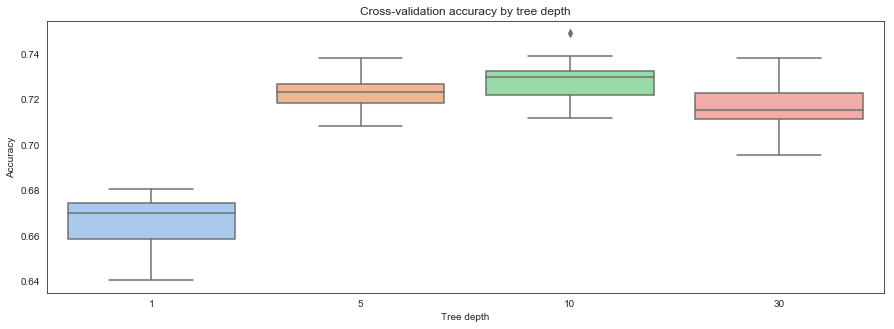

In [47]:
# Get the score dictionary into a data frame and arrange the variables for plotting
scor = pd.DataFrame(scores)
scor['index'] = scor.index
scor = pd.melt(scor, id_vars = ['index'], value_vars = depths)

## Boxplot: shows scrore variation across depths
plt.figure(figsize=(15, 5))

sns.boxplot(x='variable',y='value', data = scor, palette='pastel')  
plt.title('Cross-validation accuracy by tree depth')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()

[0, 1] 
 [[6818  836]
 [1607 4414]] 

 [[1611  341]
 [ 520  947]]


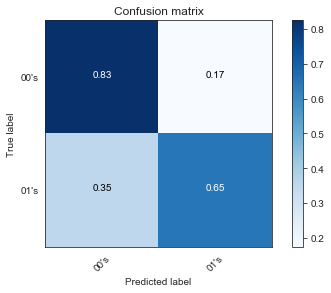

In [48]:
from sklearn.metrics import confusion_matrix

### Test labels for confusion matrix
rfc = ensemble.RandomForestClassifier(n_jobs= -1,max_depth = 10)
y_pred_train = rfc.fit(X_train2, Y_train).predict(X_train2)
y_pred_test = rfc.fit(X_train2, Y_train).predict(X_test2)
print(sorted(Y.unique()), '\n',
      confusion_matrix(Y_train, y_pred_train), '\n\n',
      confusion_matrix(Y_test, y_pred_test))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_matrix(Y_test, y_pred_test), classes=["{:02d}'s".format(label%100) for label in sorted(Y.unique())],
                      title='Confusion matrix', normalize=True)


# KNN

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
X_train2_scaled = scaler.fit_transform(X_train)
X_test2_scaled = scaler.transform(X_test)

In [52]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsClassifier(n_neighbors=14)
knn_model = knn.fit(X_train2_scaled, Y_train)

In [53]:
cross_knn = cross_val_score(knn, X_train2_scaled, Y_train, cv=10)

In [54]:
cross_knn

array([0.69831994, 0.75146199, 0.71125731, 0.72587719, 0.74762253,
       0.72787125, 0.72201902, 0.71470373, 0.7315289 , 0.72640819])

In [55]:
cross_knn.mean()

0.7257070053859287

In [56]:
print('Predicting on train: ' + str(knn_model.score(X_train2_scaled, Y_train)))
print('Predicting on test: ' + str(knn_model.score(X_test2_scaled, Y_test)))

Predicting on train: 0.7738208409506399
Predicting on test: 0.7513892951155309


In [57]:
### Test labels for confusion matrix
knn = neighbors.KNeighborsClassifier(n_neighbors=14)
y_pred_train = knn.fit(X_train2_scaled, Y_train).predict(X_train2_scaled)
y_pred_test = knn.fit(X_train2_scaled, Y_train).predict(X_test2_scaled)
print(sorted(Y.unique()), '\n',
      confusion_matrix(Y_train, y_pred_train), '\n\n',
      confusion_matrix(Y_test, y_pred_test))


[0, 1] 
 [[6248 1406]
 [1687 4334]] 

 [[1559  393]
 [ 457 1010]]
